### Importing required packages

In [19]:
import pandas as pd
import numpy as np
import csv
from textblob import TextBlob

# For data preprocessing
import re, unicodedata
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# For creating Twitter API
import tweepy

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### API Chosen:

Twitter API - tweepy is chosen mine tweets on input subject

In [20]:
subject = input('Enter the subject to analyse ')

Enter the subject to analyse GlobalWarming


### Establishing connection to Twitter API to mine data

In [21]:
consumer_key = "QcxlcCuN9Nadl91jPfnhoDdVG"
consumer_key_secret = "XRNYmGQCMakpC1KCyXeyo8uHoQEafFPnUCGSB6Ox88NWp4jLXc"
access_token = "2998376227-Ndfeg4WfmGjm6JdgZeOCEZqHoDfN6u8rR4cDHwO"
access_token_secret = "VJV8aHA45BuEzcCA2JZlHEZom0WUWeHVXWr6qxXsspu6Y"

auth = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Mining tweets with search term, language and number of tweets specified and repeating the process to download enough data for analysis

In [22]:
tweets=[];
for i in range(0,10):
    tweets = tweets + api.search(subject, "en", count=100)

### Parsing the data and storing the data to a CSV file

In [23]:
csvFile = open('tweets.csv','w',newline='',encoding='utf-8')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Tweet','Length','Date','Source','Likes','Retweet_Count'])
for tweet in tweets:
    csvWriter.writerow([tweet.text.encode('utf-8'), len(tweet.text), tweet.created_at, \
                        tweet.source, tweet.favorite_count, tweet.retweet_count])

csvFile.close()

### Loading and Representing the data using DataFrames

In [25]:
tweets_data = pd.read_csv('tweets.csv')
tweets_data.head()

,Tweet,Length,Date,Source,Likes,Retweet_Count
0,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 11:00:48,Twitter for Android,0,4024
1,b'RT @Bitchem_SM: Turning the rural roads of N...,140,2019-03-30 11:00:45,Moringbot,0,1
2,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 11:00:24,Twitter for iPhone,0,4024
3,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 10:59:53,Twitter for Android,0,4024
4,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 10:59:41,Twitter for Android,0,4024


### Data Preprocessing for Sentiment Analysis

In [26]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = lowercase(words)
    words = remove_punctuation(words)
    return words

def lemmatize(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma)
    return lemmas

# Stopwords are not removed as it results in removal of most of the words in tweets and it does not affect the tweet's sentiment 

In [27]:
# Cleaning tweet for sentiment analysis
tweets_data['Cleaned Tweet']= [lemmatize(normalize(word_tokenize(tweet))) for tweet in tweets_data['Tweet']]
tweets_data['Sentiment']= [TextBlob(str(tweet)).sentiment[0] for tweet in list(tweets_data['Cleaned Tweet'])]

In [28]:
# Labelling the sentiment as Positive,Negetive or Neutral based on the value returned by TextBlob
i=0;
tweets_data['Sentiment']='';
for tweet in tweets_data['Cleaned Tweet']:
    j = TextBlob(str(tweet)).sentiment[0]
    if(j > 0):
        tweets_data['Sentiment'][i]='Positive'
        i=i+1
    elif(j < 0):
        tweets_data['Sentiment'][i]='Negative'
        i=i+1
    else:
        tweets_data['Sentiment'][i]='Neutral'
        i=i+1

In [31]:
# Data ready for analysis
tweets_data.head()

,Tweet,Length,Date,Source,Likes,Retweet_Count,Cleaned Tweet,Sentiment
0,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 11:00:48,Twitter for Android,0,4024,"[b, rt, rarohde, animation, showing, how, the,...",Negative
1,b'RT @Bitchem_SM: Turning the rural roads of N...,140,2019-03-30 11:00:45,Moringbot,0,1,"[brt, bitchem_sm, turning, the, rural, road, o...",Neutral
2,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 11:00:24,Twitter for iPhone,0,4024,"[b, rt, rarohde, animation, showing, how, the,...",Negative
3,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 10:59:53,Twitter for Android,0,4024,"[b, rt, rarohde, animation, showing, how, the,...",Negative
4,"b""RT @RARohde: Animation showing how the distr...",140,2019-03-30 10:59:41,Twitter for Android,0,4024,"[b, rt, rarohde, animation, showing, how, the,...",Negative


### Plotting and Analysis

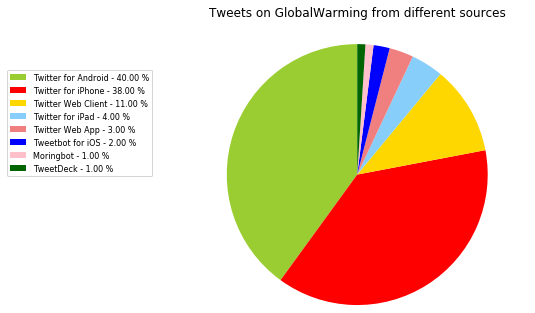

In [38]:
# Analysis on source of tweets

# Getting the value counts of the Source from the tweets_data
Source = tweets_data.Source.value_counts(normalize=True)

# Ploting
fig, ax = plt.subplots()
ax.axis('equal')

colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey']
percent = 100*Source

patches, texts = plt.pie(Source, colors=colors, startangle=90, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(Source.index, percent)]

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=8)

plt.title('Tweets on ' + subject + ' from different sources', y=1.2)
plt.show()

### Analysis on source of tweets

This graph shows the distribution of tweets from various sources and devices. It provides clarity regarding which sources are being used to tweet. This information can help target users for advertising purposes 

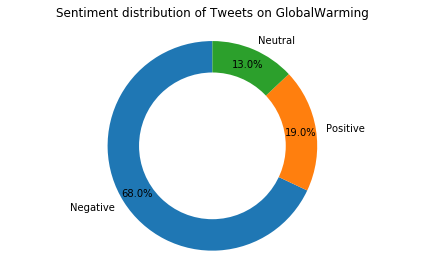

In [40]:
# Analysis on sentiment distribution of tweets

# Getting the value counts of the Sentiment from the tweets_data
Sentiment = tweets_data.Sentiment.value_counts(normalize=True)

# Ploting
fig, ax = plt.subplots()
ax.axis('equal')

plt.pie(Sentiment,labels=Sentiment.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Adding a circle at the centre to make donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sentiment distribution of Tweets on ' + subject, y=1)
plt.tight_layout()
plt.show()

### Analysis on sentiment distribution of tweets

This graph shows the distribution of tweets categorised according to the sentiment of the tweet. This visualization aids in understanding the general sentiment of the tweets. This analysis is of importance when tweets of products or world events are being studied, as it provides clarity regarding the general opinion that is prevailing and take actions accordingly

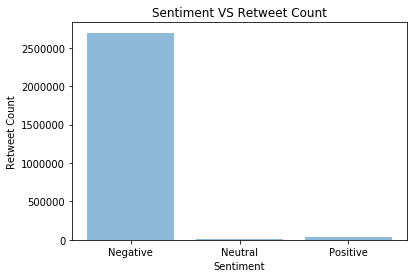

In [34]:
# Analysis on sentiment V/S retweet count

# Getting the sum of Retweet_Count grouped by Sentiment
retweet = tweets_data.groupby('Sentiment').sum().Retweet_Count

# Plotting
y_pos = np.arange(len(retweet))
 
plt.bar(y_pos, retweet, align='center', alpha=0.5)
plt.xticks(y_pos, retweet.index)
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')

plt.title('Sentiment VS Retweet Count')
 
plt.show()

### Analysis on sentiment V/S retweet count

This visualization is used to understand the relationship between the sentiment of the tweet being analysed and the number of times the tweet has been retweeted. The notion that a popular opinion/sentiment is shared widely is further clarified using the retweet count

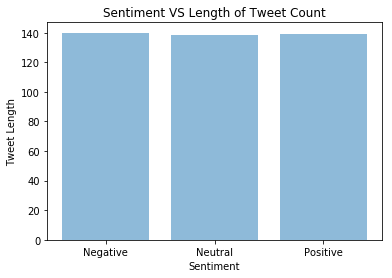

In [35]:
# Analysis on Sentiment V/S length of the tweet

# getting the mean length of tweets grouped by Sentiment
length = tweets_data.groupby('Sentiment').mean().Length

# Ploting
y_pos = np.arange(len(length))
 
plt.bar(y_pos, length, align='center', alpha=0.5)
plt.xticks(y_pos, length.index)
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')

plt.title('Sentiment VS Length of Tweet Count')
 
plt.show()

### Analysis on Sentiment V/S length of the tweet

This chart is used to analyze the relationship between the sentiment of tweets and the length of the tweets. As tweets are limited to 144 characters, it can be seen as to which tweets are maximizing this limit to convey a particular sentiment. An application of this visualization would be to understand and make most of the 144 characters to convey sentiments effectively

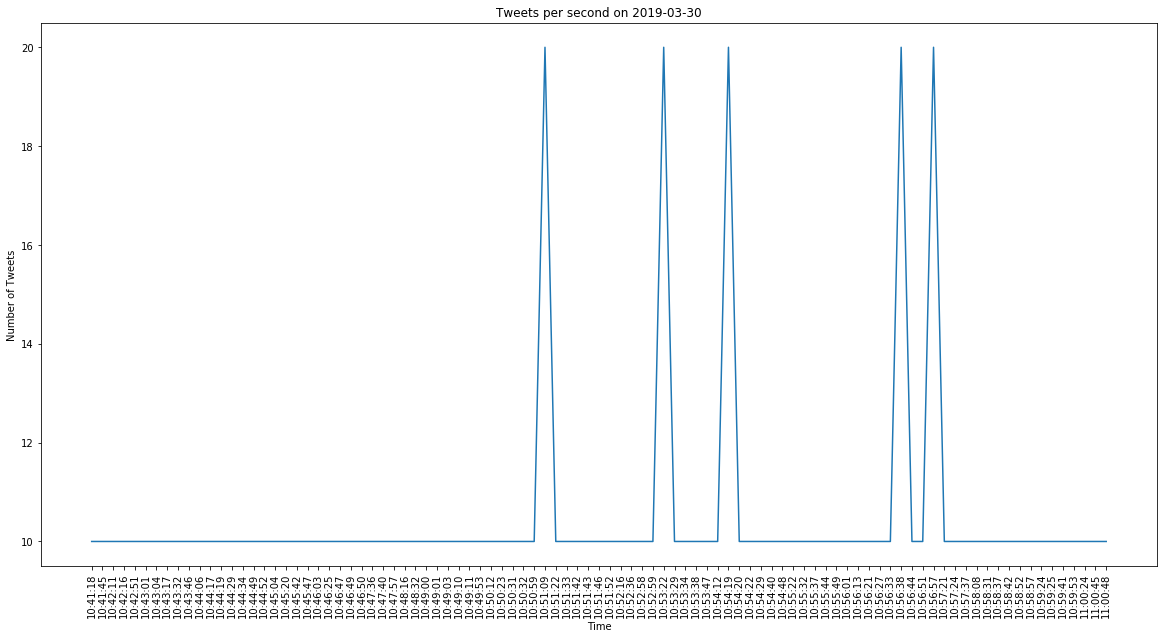

In [36]:
# Analysis on number of tweets per second
plt.figure(figsize=(20,10))

# Plotting the number of tweets per sec by counting the sorted date value
second = tweets_data.Date.value_counts().sort_index()
y_pos = np.arange(len(second))

second.plot()
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.xticks(y_pos, [w[11:] for w in second.index], rotation=90) # Extracting only time from datetime for xticks

plt.title('Tweets per second on ' + second.index[0][:10])
plt.show()

### Analysis on number of tweets per second

The above bar chart can be used to analyse the number of tweets per second, the sudden rise in the number of tweets could be a  reaction to the news reports or the official announcements